
# <Center> Data Analytics and Visualisation </Center>
# <Center> Name : Aditya Tomar </Center>
# <Center> Student Id : 202051012 </Center>

In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data analytics/lab6/Stocks_pe.csv")

In [3]:
data = data.dropna()
data

,Company Name,Index_type,Sector,Industry,Symbol,P/E,MarketCap
0,Reliance Industries Limited,Large,Energy,Oil & Gas Refining & Marketing,RELIANCE,27.617010,1.631686e+13
1,Tata Consultancy Services Limited,Large,Technology,Information Technology Services,TCS,37.613270,1.415626e+13
2,HDFC Bank Limited,Large,Financial Services,Banks—Regional,HDFCBANK,23.326649,8.380209e+12
3,Infosys Limited,Large,Technology,Information Technology Services,INFY,33.900620,7.280080e+12
4,Hindustan Unilever Limited,Large,Consumer Defensive,Household & Personal Products,HINDUNILVR,61.147617,5.356948e+12
...,...,...,...,...,...,...,...
1915,CKP Leisure Limited,None,Don't Know,Don't Know,CKPLEISURE,0.000000,0.000000e+00
1916,CKP Products Limited,None,Don't Know,Don't Know,CKPPRODUCT,0.000000,0.000000e+00
1917,Fourth Dimension Solutions Limited,None,Don't Know,Don't Know,FOURTHDIM,0.000000,0.000000e+00
1918,Artedz Fabs Limited,None,Don't Know,Don't Know,ARTEDZ,0.000000,0.000000e+00


In [4]:
data = data.loc[(data['P/E'] != 0) & (data['MarketCap'] !=0)]
data

,Company Name,Index_type,Sector,Industry,Symbol,P/E,MarketCap
0,Reliance Industries Limited,Large,Energy,Oil & Gas Refining & Marketing,RELIANCE,27.617010,1.631686e+13
1,Tata Consultancy Services Limited,Large,Technology,Information Technology Services,TCS,37.613270,1.415626e+13
2,HDFC Bank Limited,Large,Financial Services,Banks—Regional,HDFCBANK,23.326649,8.380209e+12
3,Infosys Limited,Large,Technology,Information Technology Services,INFY,33.900620,7.280080e+12
4,Hindustan Unilever Limited,Large,Consumer Defensive,Household & Personal Products,HINDUNILVR,61.147617,5.356948e+12
...,...,...,...,...,...,...,...
1856,Nakoda Limited,None,Consumer Cyclical,Textile Manufacturing,NAKODA,0.021617,1.500000e+07
1862,PBA Infrastructure Limited,None,Industrials,Engineering & Construction,PBAINFRA,7.011893,1.925843e+08
1872,Quintegra Solutions Limited,None,Technology,Information Technology Services,QUINTEGRA,35.576923,4.960553e+07
1882,Sharon Bio-Medicine Limited,None,Healthcare,Drug Manufacturers—Specialty & Generic,SHARONBIO,1.028999,3.817836e+07


In [5]:
mean = data['P/E'].mean()
median = data['P/E'].median()
print("mean :",mean)
print("median :",median)

mean : 50.95912372328677
median : 20.721981


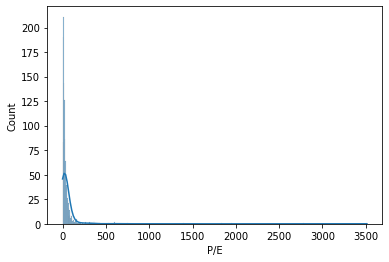

In [6]:
sns.histplot(data=data,x='P/E',kde=True)

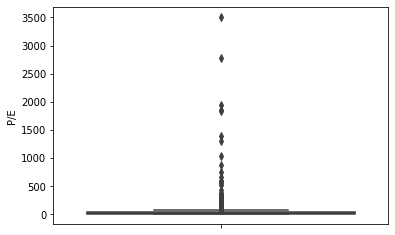

In [7]:
sns.boxplot(y=data["P/E"])

In [8]:
data = data.loc[data['MarketCap'] != 0]
data

,Company Name,Index_type,Sector,Industry,Symbol,P/E,MarketCap
0,Reliance Industries Limited,Large,Energy,Oil & Gas Refining & Marketing,RELIANCE,27.617010,1.631686e+13
1,Tata Consultancy Services Limited,Large,Technology,Information Technology Services,TCS,37.613270,1.415626e+13
2,HDFC Bank Limited,Large,Financial Services,Banks—Regional,HDFCBANK,23.326649,8.380209e+12
3,Infosys Limited,Large,Technology,Information Technology Services,INFY,33.900620,7.280080e+12
4,Hindustan Unilever Limited,Large,Consumer Defensive,Household & Personal Products,HINDUNILVR,61.147617,5.356948e+12
...,...,...,...,...,...,...,...
1856,Nakoda Limited,None,Consumer Cyclical,Textile Manufacturing,NAKODA,0.021617,1.500000e+07
1862,PBA Infrastructure Limited,None,Industrials,Engineering & Construction,PBAINFRA,7.011893,1.925843e+08
1872,Quintegra Solutions Limited,None,Technology,Information Technology Services,QUINTEGRA,35.576923,4.960553e+07
1882,Sharon Bio-Medicine Limited,None,Healthcare,Drug Manufacturers—Specialty & Generic,SHARONBIO,1.028999,3.817836e+07


In [ ]:
data["wt"]=data["MarketCap"]/data["MarketCap"].sum()
data
\

,Company Name,Index_type,Sector,Industry,Symbol,P/E,MarketCap,wt
0,Reliance Industries Limited,Large,Energy,Oil & Gas Refining & Marketing,RELIANCE,27.617010,1.631686e+13,6.933172e-02
1,Tata Consultancy Services Limited,Large,Technology,Information Technology Services,TCS,37.613270,1.415626e+13,6.015116e-02
2,HDFC Bank Limited,Large,Financial Services,Banks—Regional,HDFCBANK,23.326649,8.380209e+12,3.560822e-02
3,Infosys Limited,Large,Technology,Information Technology Services,INFY,33.900620,7.280080e+12,3.093367e-02
4,Hindustan Unilever Limited,Large,Consumer Defensive,Household & Personal Products,HINDUNILVR,61.147617,5.356948e+12,2.276212e-02
...,...,...,...,...,...,...,...,...
1856,Nakoda Limited,None,Consumer Cyclical,Textile Manufacturing,NAKODA,0.021617,1.500000e+07,6.373627e-08
1862,PBA Infrastructure Limited,None,Industrials,Engineering & Construction,PBAINFRA,7.011893,1.925843e+08,8.183070e-07
1872,Quintegra Solutions Limited,None,Technology,Information Technology Services,QUINTEGRA,35.576923,4.960553e+07,2.107781e-07
1882,Sharon Bio-Medicine Limited,None,Healthcare,Drug Manufacturers—Specialty & Generic,SHARONBIO,1.028999,3.817836e+07,1.622231e-07


In [ ]:
tmp=(data["P/E"]*data["wt"])/data["wt"].sum()
weighted_mean=tmp.sum()
weighted_mean

74.23566337509136

In [ ]:
sort_data=data.sort_values(by=['P/E'])
#print(sort_data)
weighted_median=0
# step-2
wgtsum=0
for idx, w in sort_data.iterrows():
    wgtsum+=w["wt"]
    if wgtsum>=0.5:
        print(w)
        weighted_median=w["P/E"]
        break
weighted_median

Company Name    UltraTech Cement Limited
Index_type                         Large
Sector                   Basic Materials
Industry              Building Materials
Symbol                        ULTRACEMCO
P/E                            32.069355
MarketCap                2082795683840.0
wt                               0.00885
Name: 18, dtype: object


32.069355

In [9]:
#  Trimmed Mean
sort_data=data.sort_values(by=['P/E'])
#print(sort_data)

trimed_percentage=0.1
trimnum=math.floor(len(sort_data)*trimed_percentage)
trimmean=sort_data["P/E"].iloc[trimnum:len(sort_data)-trimnum].mean()
trimmean

25.92083553356854

In [10]:
data["P/E"]-data["P/E"].mean()

0      -23.342114
1      -13.345854
2      -27.632475
3      -17.058504
4       10.188493
          ...    
1856   -50.937507
1862   -43.947230
1872   -15.382201
1882   -49.930125
1897   -50.823377
Name: P/E, Length: 1238, dtype: float64

In [12]:
# Standard deviation
data["P/E"].std()

178.88634724418523

In [13]:
# Variance
data["P/E"].var()

32000.325230367216

In [14]:
# Mean absolute deviation
((data["P/E"]-data["P/E"].mean()).abs()).mean()

51.35510026508983

In [15]:
# Median absolute deviation from the median
data1=data["P/E"]-data["P/E"].median()
data2=data1.abs()
data3=data2.sort_values()
data3.median()

11.5634205

In [16]:
# Range (Order statistics)
data_sort=data["P/E"].sort_values()
print(data_sort.iloc[-1])
print(data_sort.iloc[0])
Range=data_sort.iloc[-1]-data_sort.iloc[0]
Range

3512.5
0.019769566


3512.480230434

In [17]:
# Percentile (Order Statistics)
print(data["P/E"].median()) #  Median is 50th percentile
th=data["P/E"].quantile(0.5)
print(th)
print((data["P/E"]<th).sum()+1)
len(data)*0.25

20.721981
20.721981
620


309.5

In [18]:
# Inter Quantiles Range (Order Statistics)
IQR=data["P/E"].quantile(0.75)-data["P/E"].quantile(0.25)
IQR

28.507582499999998

In [19]:
data_sort=data["P/E"].sort_values()
idx=len(data_sort)*0.25
print(idx)
#idx=math.floor(idx)
th=data_sort.iloc[-1]
sm=idx+1
while sm>idx:
    sm=(data_sort<=th).sum()
    th=th-0.1
th=th+0.1
print(th)

309.5
11.500000002098902


In [20]:
(data_sort<=th).sum()+1

309